In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

In [5]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, cache=True)

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
pixel_values, targets = data 
targets = targets.astype(int)

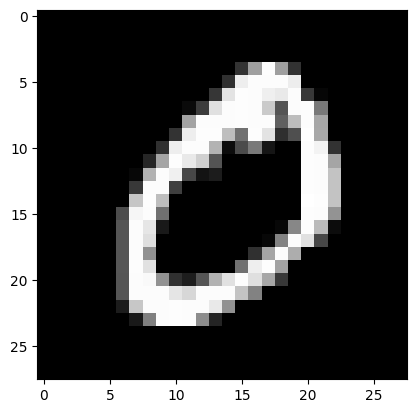

In [10]:
single_image = pixel_values.values[1,:].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [11]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.values[:3000, :])

See more [T-SNE](https://www.youtube.com/watch?v=LcYmoLSs4Tc&t=2s)

See more [T-SNE](https://miroslawmamczur.pl/jak-dziala-metoda-redukcji-wymiarow-t-sne/)

In [21]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])), columns=["x", "y", "targets"] )
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [22]:
tsne_df

,x,y,targets
0,20.515184,-11.026083,5.0
1,57.560905,0.121864,0.0
2,-0.679077,-54.268143,4.0
3,-41.528664,11.559952,1.0
4,-10.032307,-33.632420,9.0
...,...,...,...
2995,-35.470184,-24.492340,7.0
2996,52.467827,-3.201818,0.0
2997,-30.010117,-13.070750,9.0
2998,-29.661884,45.717960,1.0


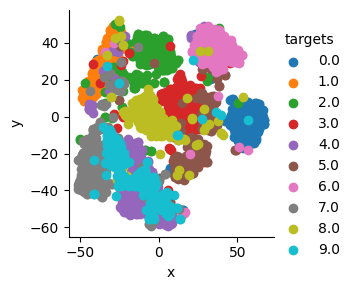

In [26]:
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()